# Анализ оттока клиентов банка

# Описание проекта

**Заказчик** - отдел маркетинга банка "Метапромбанк", в котором в последнее время повысился отток клиентов.

**Задача:** 
- провести анализ клиентов банка с целью выделения сегментов клиентов, которые склонны уходить из банка, 
- предложить меры по удержанию таких клиентов.

# План выполнения проекта

1. Загрузка данных и изучение общей информации.
- Загрузка данных.
- Изучение значений каждого столбца.
- Проверка соответствия типов данных.


2. Предобработка данных.
- Приведение наименований столбцов к единому стилю.
- Коррекция значений столбцов с категориальными переменными.
- Анализ пропусков.
- Анализ дубликатов.
- Изменение типа данных.
- Изучение аномальных значений.


3. Исследовательский анализ данных.
- Составление портретов клиентов банка.
- Изучение распределения характеристик в разрезе оттока с помощью графиков.
- Корреляционный анализ признаков и его визуализация.


4. Формулировка и проверка статистических гипотез.
- Гипотеза о различии дохода между клиентами, которые ушли и которые остались.
- Гипотеза о различии кредитных рейтингов клиентов, которые ушли и которые остались.


5. Сегментация отточных клиентов.


6. Выводы и рекомендации.

## Загрузка данных и изучение общей информации

In [1]:
# Импортирую библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаю данные
try: df = pd.read_csv('bank_scrooge.csv')  
except: df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# Изучаю общую информацию о данных
display(df.head())
display(df.info())
display(df.isna().sum()) 
display(df.describe())
print('Количество явных дубликатов:', df.duplicated().sum())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Количество явных дубликатов: 0


In [4]:
# Изучаю уникальные значения в каждом столбце
values = pd.DataFrame()
for col in df.columns:
        values[col] = [df[col].unique(), df[col].nunique()]
values.transpose().rename({0: 'Значения', 1: 'Кол-во уникальных значений'}, axis=1)

,Значения,Кол-во уникальных значений
USERID,"[183012, 146556, 120722, 225363, 157978, 20230...",9927
score,"[850.0, 861.0, 892.0, 866.0, 730.0, 856.0, 807...",348
city,"[Рыбинск, Ярославль, Ростов]",3
gender,"[Ж, М]",2
age,"[25.0, 37.0, 30.0, 51.0, 34.0, 56.0, 39.0, 38....",68
equity,"[1, 5, 0, 4, 3, 2, 6, 7, 8, 9]",10
balance,"[59214.82, 850594.33, nan, 1524746.26, 174.0, ...",7701
products,"[2, 3, 1, 4, 5, 0]",6
credit_card,"[0, 1]",2
last_activity,"[1, 0]",2


**Описание данных:**

- *USERID* — идентификатор пользователя. Следует привести наименование столбца к "хорошему" стилю. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют. Количество уникальных значений меньше, чем количество записей в датафрейме. Значит встречаются записи с одинаковым идентификатором пользователя. Следует проверить столбец на наличие дубликатов. 
- *score* — баллы кредитного скоринга. Тип данных - float, изменение типа данных не требуется. Пропуски отсутствуют.
- *city* — город. Тип данных - object, изменение типа данных не требуется. Пропуски отсутствуют. Для проведения корреляционного анализа следует осуществить кодирование значений столбца.
- *gender* — пол. Тип данных - object, изменение типа данных не требуется. Пропуски отсутствуют. Для проведения корреляционного анализа следует осуществить кодирование значений столбца.
- *age* — возраст. Тип данных - float, следует изменить тип данных на int. Имеется 26 пропусков. 
- *equity* — количество баллов собственности. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют.
- *balance* — баланс на счёте. Тип данных - float, изменение типа данных не требуется. Имеется 2295 пропусков. Следует рассмотреть их подробно.
- *products* — количество продуктов, которыми пользуется клиент. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют. Минимальное значение столбца равно 0. Следует отдельно рассмотреть эти строки, так как если человек является клиентом банка, то он пользуется как минимум одним продуктом. 
- *credit_card* — есть ли кредитная карта. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют. 
- *last_activity* — активный клиент. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют.
- *EST_SALARY* — оценочный доход клиента. Следует привести наименование столбца к "хорошему" стилю. Тип данных - float, изменение типа данных не требуется. Пропуски отсутствуют.
- *сhurn* — признак оттока. Тип данных - int, изменение типа данных не требуется. Пропуски отсутствуют.

**Вывод:**
- В датасете 10000 строк.
- Следует заменить тип данных в столбце age. В остальных столбцах тип данных соответствует значениям.
- Следует привести наименование столбцов USERID и  EST_SALARY к "хорошему" стилю.
- Явные дубликаты отсутстуют.
- Следует изучить дубликаты в столбце USERID.
- Следует осуществить кодирование значений столбцов city и gender.
- Следует провести анализ пропусков в столбцах age и balance.
- Следует рассмотреть строки, где значение столбца products равно 0.

## Предобработка данных

### Приведение наименований столбцов к единому стилю

In [5]:
# Приведу названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Коррекция значений столбцов с категориальными переменными

In [6]:
# Создаю копию столбца city
df['city_2']=df['city']
# Кодирую данные в столбце city_2
df = pd.get_dummies(df, columns = ['city_2'])

In [7]:
# Создаю копию столбца gender
df['gender_2']=df['gender']
# Кодирую данные в столбце gender_2, оставив только 1 столбец
df = pd.get_dummies(df, columns = ['gender_2'], drop_first=True)

In [8]:
# Изменю названия новых столбцов
df = df.rename (
    columns = ({
        'city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск','city_2_Ярославль':'Ярославль', 
        'gender_2_М':'male'}))
df.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,0


### Анализ пропусков

Пропуски имеются в столбцах age и balance. В столбце age 26 пропусков. Это 0,26% от общего числа данных. Замена этих значений не повлияет на результаты исследования, но позволит заменить тип даннх на int. Заменю эти пропуски медианой.

In [9]:
df['age'] = df['age']. fillna(df['age'].median())

В столбце balance 2295 пропусков. Это более 20% от общего числа данных. Удаление или заполнение этих пропусков может исказить результаты исследования, поэтому рассмотрю их более детально.

In [10]:
# Сравню средние значения параметров с пропусками в столбце balance и без

blalance_notna = df[df['balance'].notna()].mean(numeric_only=True).drop(['userid', 'balance'],axis = 0)
blalance_isna = df[df['balance'].isna()].mean(numeric_only=True).drop(['userid', 'balance'],axis = 0)

pd.concat({'Среднее без пропусков': blalance_notna,
           'Среднее с пропусками': blalance_isna,
           "Разница %": (blalance_isna/blalance_notna-1)*100},axis=1)

,Среднее без пропусков,Среднее с пропусками,Разница %
score,843.739260,865.352070,2.561551
age,42.920571,42.078431,-1.962089
equity,3.395068,0.050980,-98.498399
products,2.080986,1.162092,-44.156698
credit_card,0.640104,0.815686,27.430307
last_activity,0.515769,0.549455,6.531288
est_salary,124501.872366,226310.208654,81.772534
churn,0.234523,0.005664,-97.584677
Ростов,0.153407,0.102397,-33.251680
Рыбинск,0.272810,0.258388,-5.286489


Средние значения отличаются по столбцам:
- equity - у клиентов с пропусками средний бал оценки собственности значительно ниже,
- products - клиенты с пропусками в среднем используют 1 продукт, клиенты без пропусков - 2, 
- churn - уровень оттока у клиентов без пропусков значительно выше, значит наличие пропусков нельзя связать с оттоком,
- est_salary - уровень дохода выше у клиентов с пропусками. 

Исходя из этих наблюдений сложно определить природу появления пропусков.

Создам новую характеристику клиента balance_na - отсутствие баланса, и посчитаю ее корреляцию с остальными характеристиками

In [11]:
df['balance_na']=df['balance']
df['balance_na'] = df['balance_na'].apply(lambda x: 1 if pd.isna(x) else 0)
df.corrwith(df['balance_na']).sort_values(key=abs).apply('{:.2f}'.format).drop(['userid', 'balance'],axis = 0)

Рыбинск          -0.01
last_activity     0.03
age              -0.03
Ярославль         0.06
Ростов           -0.06
male              0.06
score             0.14
credit_card       0.16
churn            -0.25
est_salary        0.31
products         -0.49
equity           -0.71
balance_na        1.00
dtype: object

Наблюдаются множественные корреляции и сложно выделить какую-то одну зависимость пропусков от остальных данных, поэтому не представляется выделить какой-то один признак и заполнить по нему пропуски.

Исходя из полученных значений корреляции можно выдвинуть несколько предположений:
- сильная обратная корреляция с отточностью, количеством продуктов и оценкой собственности - это могут быть новые клиенты, и поэтому у них ещё нет продуктов, счёта, и оценки собственности;
- корреляция с наличием кредитной карты - это могут быть клиенты у которых из продуктов только кредитная карта, и поэтому нет дебетового счёта.

В связи с тем, что не удалось выявить зависимость пропусков от какого-то параметра и заменить их, оставлю их без изменений.

### Анализ дубликатов

In [12]:
# Найду количество дубликатов по столбцу 'userid'
df.duplicated(['userid']).sum()

73

In [13]:
# Выведу дублированные строки
duplicates = df[df.duplicated(subset='userid', keep=False)].sort_values(by = 'userid') 
duplicates

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,male,balance_na
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0,1,0,0,0
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,0,0,1,0,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,0,0,1,0,1
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0,1,0,0,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1,0,0,1,1,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,0,1,0,1,0
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0,0,0,1,1,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0,0,1,0,1,0


На первый взгяд кажется, что userid совпадают у клиентов из Рыбинска и Ярославля.

In [14]:
# Посчитаю, сколько клиентов из каждого города попали в список с дублированными userid
duplicates['city'].value_counts()

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

Количество клиентов с дублированными userid в Рыбинске и Ярославле одинаковое.

In [15]:
# Проверю есть ли совпадения userid в каждом из городов
print(duplicates[duplicates['city'] =='Ярославль'].duplicated(['userid']).sum())
print(duplicates[duplicates['city'] =='Рыбинск'].duplicated(['userid']).sum())

0
0


Так как совпадений userid в каждом городе нет, и количество клиентов с дублированными userid в Рыбинске и Ярославле одинаковое, можно сделать вывод, что эти userid были присвоены клиентам из разных городов и совпали при объединении данных из этих городов. При этом другие признаки у этих клиентов не совпадают. Значит это разные клиенты и удалять эти записи не следует.

### Изменение типа данных

In [16]:
# Изменю тип данных в столбце age на int
df['age'] = df['age'].astype('int')

### Изучение аномальных значений

При ознакомлении с таблицей внимание привлекает минимальное значение в столбце products - 0. Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом. Найду строки, в которых значение столбца products равно 0.

In [17]:
df[df['products']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,male,balance_na
8957,147837,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,0,1,0,0,1


Найдена одна такая строка. При этом значение столбца churn равно 1, то есть этот клиент ушел из банка и теперь действительно больше не пользуется банковскими продуктами. Для целей анализа необходимо изучать последние актуальные данные на момент, когда отточные пользователи еще являлись клиентами банка, поэтому эту строку следует удалить.

In [18]:
df = df[df['products']!=0]

In [19]:
# Изучаю общую информацию о данных после предобработки
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
 12  Ростов         9999 non-null   uint8  
 13  Рыбинск        9999 non-null   uint8  
 14  Ярославль      9999 non-null   uint8  
 15  male           9999 non-null   uint8  
 16  balance_na     9999 non-null   int64  
dtypes: float64(3), int64(8), object(2), uint8(4)
memory 

None

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,male,balance_na
count,9999.000000,9999.000000,9999.000000,9999.000000,7.705000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,171817.110611,848.688069,42.723672,2.627563,8.277943e+05,1.870287,0.680468,0.523552,1.478792e+05,0.181918,0.141714,0.269427,0.588859,0.500550,0.229423
std,33709.070798,65.441981,12.160120,1.980931,1.980614e+06,0.792466,0.466319,0.499470,1.393901e+05,0.385796,0.348774,0.443684,0.492065,0.500025,0.420483
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142809.500000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525212e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172740.000000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,201262.500000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745011e+05,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Вывод:**

В результате предобработки данных:
- в датафрейме имеется информация о 9999;
- переименованы столбцы USERID и EST_SALARY;
- к значениям в столбцах gender и city применена кодировка данных для удобства дальнейших расчетов;
- пропуски в столбце age заменены медианой, пропуски в столбце balance оставлены без изменений;
- проанализированы дубликаты в столбце user_id;
- удалена строка со значением products = 0, противоречащая задачи исследования.

## Исследовательский анализ данных

### Составление портретов клиентов банка

Рассмотрю распределение клиентов по всем признакам

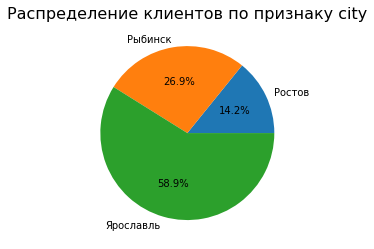

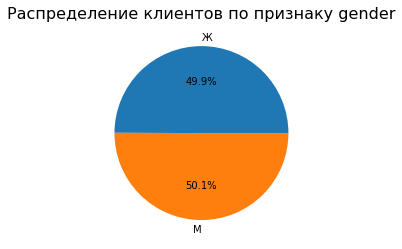

In [20]:
for column in ['city','gender']:
    df_1 = df.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df_1['userid'], labels=df_1.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}', fontsize = 16)
    plt.show()

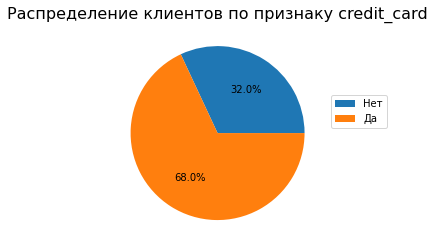

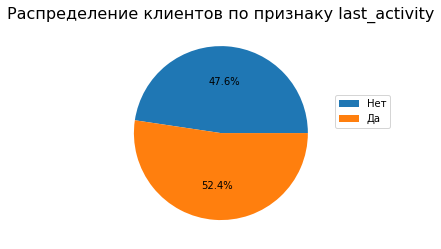

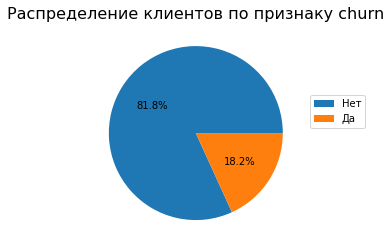

In [21]:
for column in ['credit_card', 'last_activity', 'churn']:
    df_2 = df.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df_2['userid'], autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}', fontsize = 16)
    plt.legend(['Нет', 'Да'], bbox_to_anchor=(1, 0.7))
    plt.show()

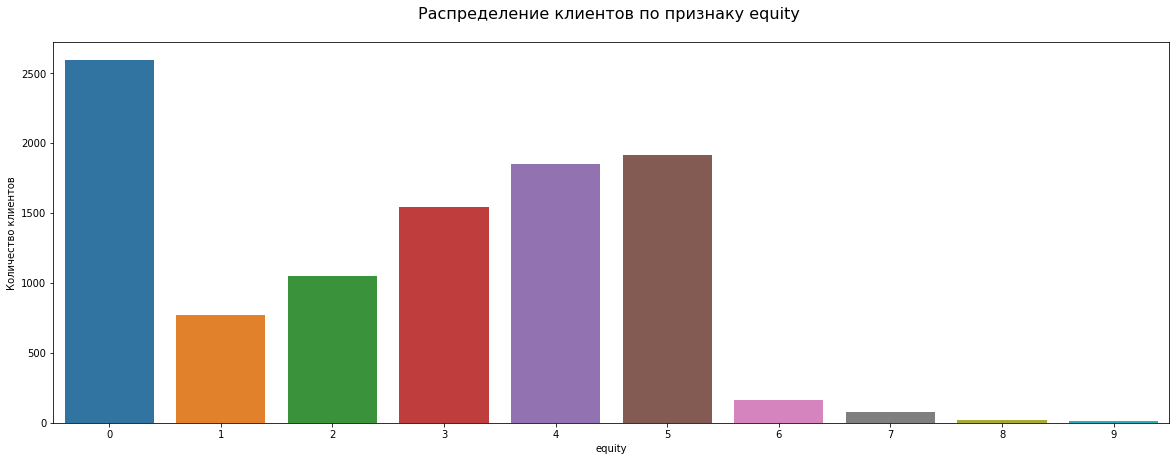

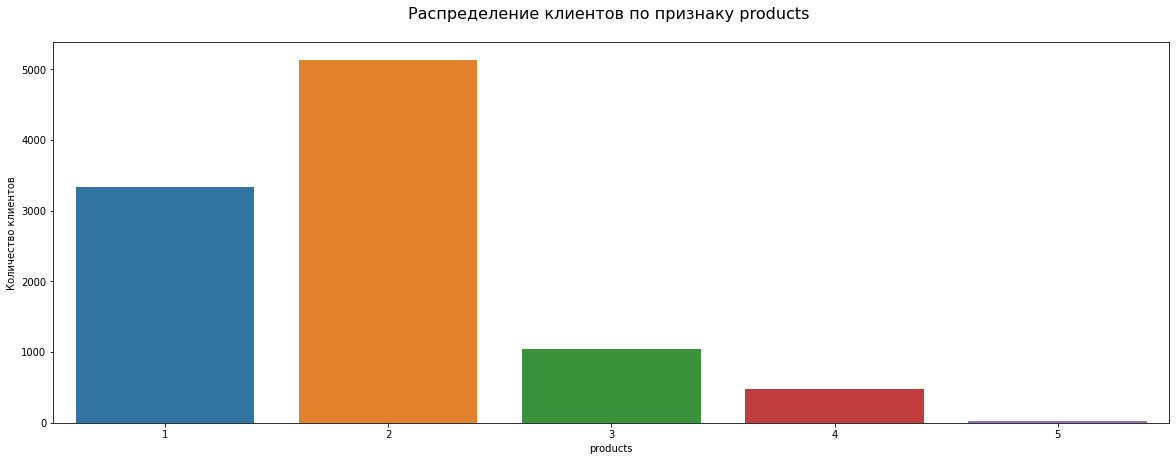

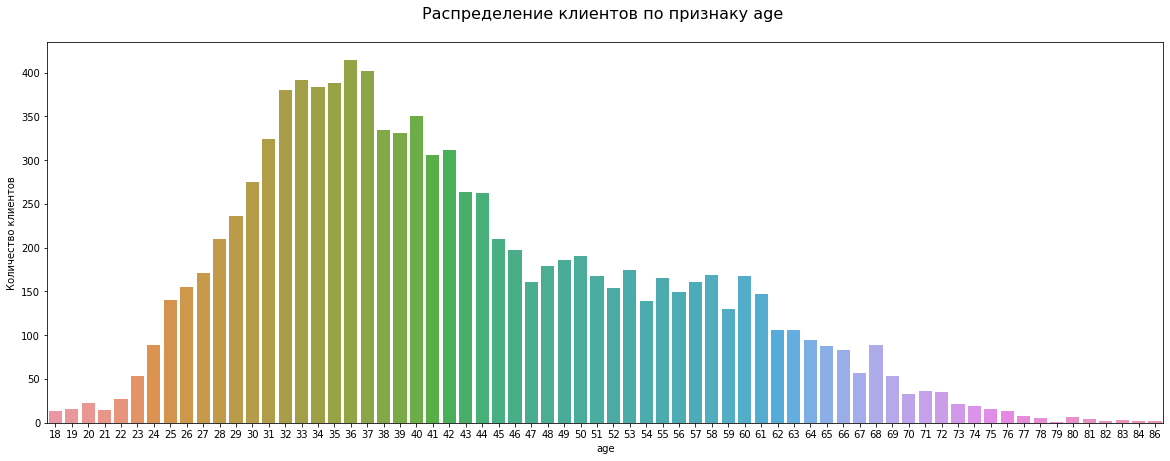

In [22]:
for column in ['equity', 'products', 'age']:
        plt.figure(figsize=(20,7));
        ax = sns.countplot(data=df, x=column);
        plt.title(f'Распределение клиентов по признаку {column} \n', fontsize = 16)
        plt.ylabel('Количество клиентов')
        plt.show()

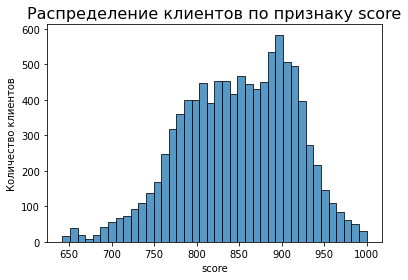

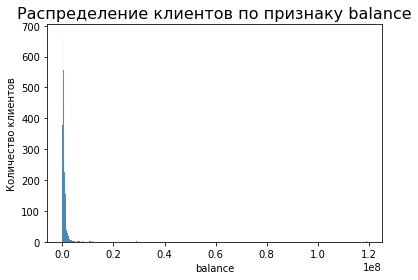

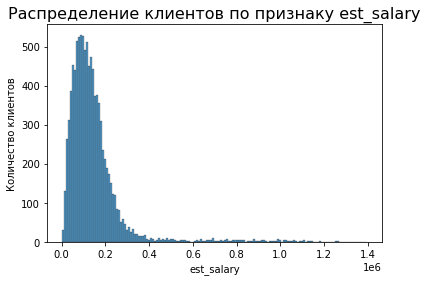

In [23]:
for column in ['score',  'balance', 'est_salary']:
        sns.histplot(data=df, x=column);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.ylabel('Количество клиентов')
        plt.show()

Из-за наличия клиентов с очень высокими доходами и очень крупными счетами н графиках не видно медианных значений этих показателей. Посчитаю их отдельно.

In [24]:
df[['score', 'balance', 'est_salary']].median()

score            853.00
balance       524272.20
est_salary    119661.51
dtype: float64

**Вывод:**
- Самый крупный филиал находится в г. Ярославль. Там обслуживаются почти 60% клиентов. 
- По полу клиенты распределяются практически поровну.
- Большинство клиентов (68%) имеют кредитную карту.
- Число активных клиентов не значительно выше неактивных.
- Уровень оттока по банку составляет 18,2%.
- Больше всего клиентов имеют самую низкую оценку собственности.
- Наибольшее число клиентов пользуются двумя продуктами, следом идут клиенты с 1 продуктом.
- Наиболее распространенный возраст клиентов - 32-37 лет.
- Большинство клиентов имеют достаточно высокий кредитный рейтинг.
- В среднем баланс на счетах клиентов составляет 520 тыс. руб., но также есть клиенты с очень крупными счетами от 10 до 120 млн. руб.
- Средний доход клиентов составляет 120 тыс. руб., но так же есть и клиенты с очень высокими доходами от 400 тыс. до 1,4 млн. руб. 

### Изучение распределения характеристик в разрезе оттока с помощью графиков

In [25]:
# Рассмотрю центральные тенденции характеристик в разрезе оттока
df_churn = df.groupby('churn').agg({
                         'churn': 'count',
                         'score' : 'median',
                         'Ростов': 'mean', 
                         'Рыбинск': 'mean', 
                         'Ярославль': 'mean',
                         'male': 'median', 
                         'age': 'median',
                         'equity': 'median',
                         'balance': 'median', 
                         'products': 'median', 
                         'credit_card': 'median', 
                         'last_activity': 'median', 
                         'est_salary': 'median'}).rename(columns = {'churn':'count'})
display(df_churn)

,count,score,Ростов,Рыбинск,Ярославль,male,age,equity,balance,products,credit_card,last_activity,est_salary
churn,,,,,,,,,,,,,
0,8180,848.0,0.140709,0.276039,0.583252,0,40,3,475382.445,2,1,0,118257.715
1,1819,866.0,0.146234,0.239692,0.614074,1,39,4,782410.470,2,1,1,125395.220


In [26]:
# Сравню центральные тенденции характеристик отточных и неотточных клиентов
pd.concat({
    'Не отточные': df_churn.iloc[0],
    'Отточные': df_churn.iloc[1],
    'Разница %': (df_churn.iloc[1]/df_churn.iloc[0]-1)*100},
    axis=1).sort_values('Разница %')

,Не отточные,Отточные,Разница %
count,8180.000000,1819.000000,-77.762836
Рыбинск,0.276039,0.239692,-13.167330
age,40.000000,39.000000,-2.500000
products,2.000000,2.000000,0.000000
credit_card,1.000000,1.000000,0.000000
score,848.000000,866.000000,2.122642
Ростов,0.140709,0.146234,3.926647
Ярославль,0.583252,0.614074,5.284481
est_salary,118257.715000,125395.220000,6.035551
equity,3.000000,4.000000,33.333333


Между средними показателями отточных и неотточных клиентов значительная разница (>10%) разница наблюдается по следующим характеристикам: balance, equity, last_activity, male, products, credit_card.

Характеристики по которым разница в отточности проявляется слабо:
est_salary, Ярославль, Ростов, score, age.

На основании проведенного анализа можно составить портреты отточных и неотточных клиентов.

**Отточные клиенты:**
- составляют 18% от общего числа клиентов банка;
- имеют более высокий балл кредитного рейтинга (866;
- чаще мужчины, чем женщины;
- средний возраст - 39 лет;
- в среднем имеют больше баллов собственности (4);
- в среднем используют 2 продукта;
- чаще более активны, чем не отточные;
- имеют чуть более высокий оценочный доход (125 тыс. руб.).

**Неотточные клиенты:**
- составляют 82% от общего числа клиентов;
- имеют более низкий балл кредитного рейтинга (848);
- чаще женщины, чем мужчины;
- средний возраст - 40 лет;
- в среднем имеют меньше баллов собственности (3);
- в среднем используют 2 продукта;
- чаще менее активны, чем отточные;
- имеют чуть более низкий оценочный доход (118 тыс. руб.).

Визуализирую распределение характеристик для более детального анализа.

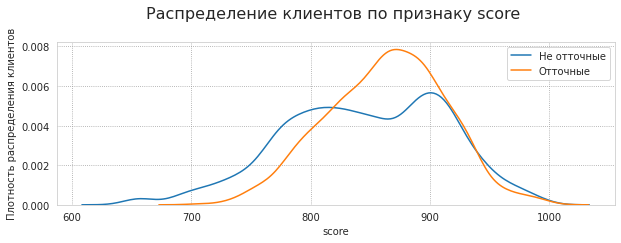

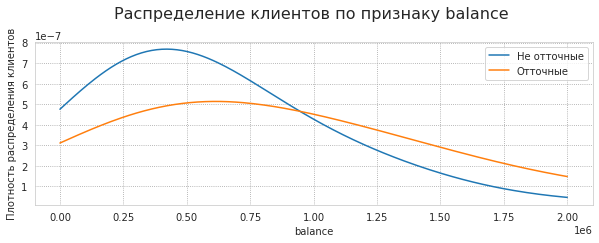

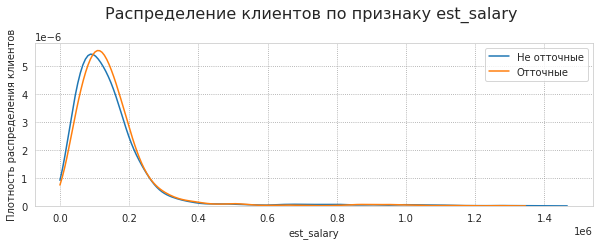

In [27]:
# Для количественных непрерывных характеристик построю графики плотности распределение
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
for column in ['score', 'balance', 'est_salary']:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df[df['churn'] == 0][column], clip=(0.0, 2000000.0), common_norm=False)
    sns.kdeplot(df[df['churn'] == 1][column], clip=(0.0, 2000000.0), common_norm=False)
    plt.legend(['Не отточные', 'Отточные'])
    plt.ylabel('Плотность распределения клиентов')
    plt.title(f'Распределение клиентов по признаку {column} \n', fontsize = 16)
    plt.show()

На графиках видно, что отточных клиентов больше среди тех, у которых:
- баллы кредитного рейтинга от 820 до 920;
- баланс на счете от 950 тыс. руб.;
- оценочный доход от 100 тыс. руб. до 230 тыс. руб.

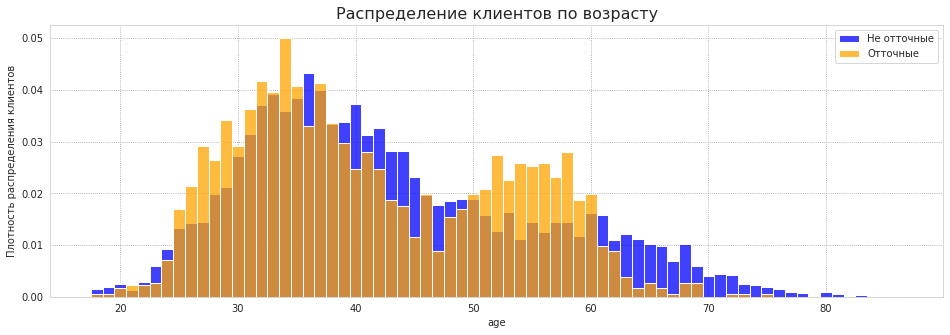

In [28]:
# Для распределения по возрасту построю гистограмму
plt.figure(figsize=(16,5))
sns.histplot(df[df['churn'] == 0]['age'], discrete=True, stat='density', common_norm=False, color='blue')
sns.histplot(df[df['churn'] == 1]['age'], discrete=True, stat='density', common_norm=False, color='orange')
plt.legend(['Не отточные', 'Отточные'])
plt.title(f'Распределение клиентов по возрасту', fontsize = 16)
plt.ylabel('Плотность распределения клиентов')
plt.show()

На графике видно, что отточных клиентов больше среди тех, возраст которых от 25 до 35 лет и от 50 до 60 лет.

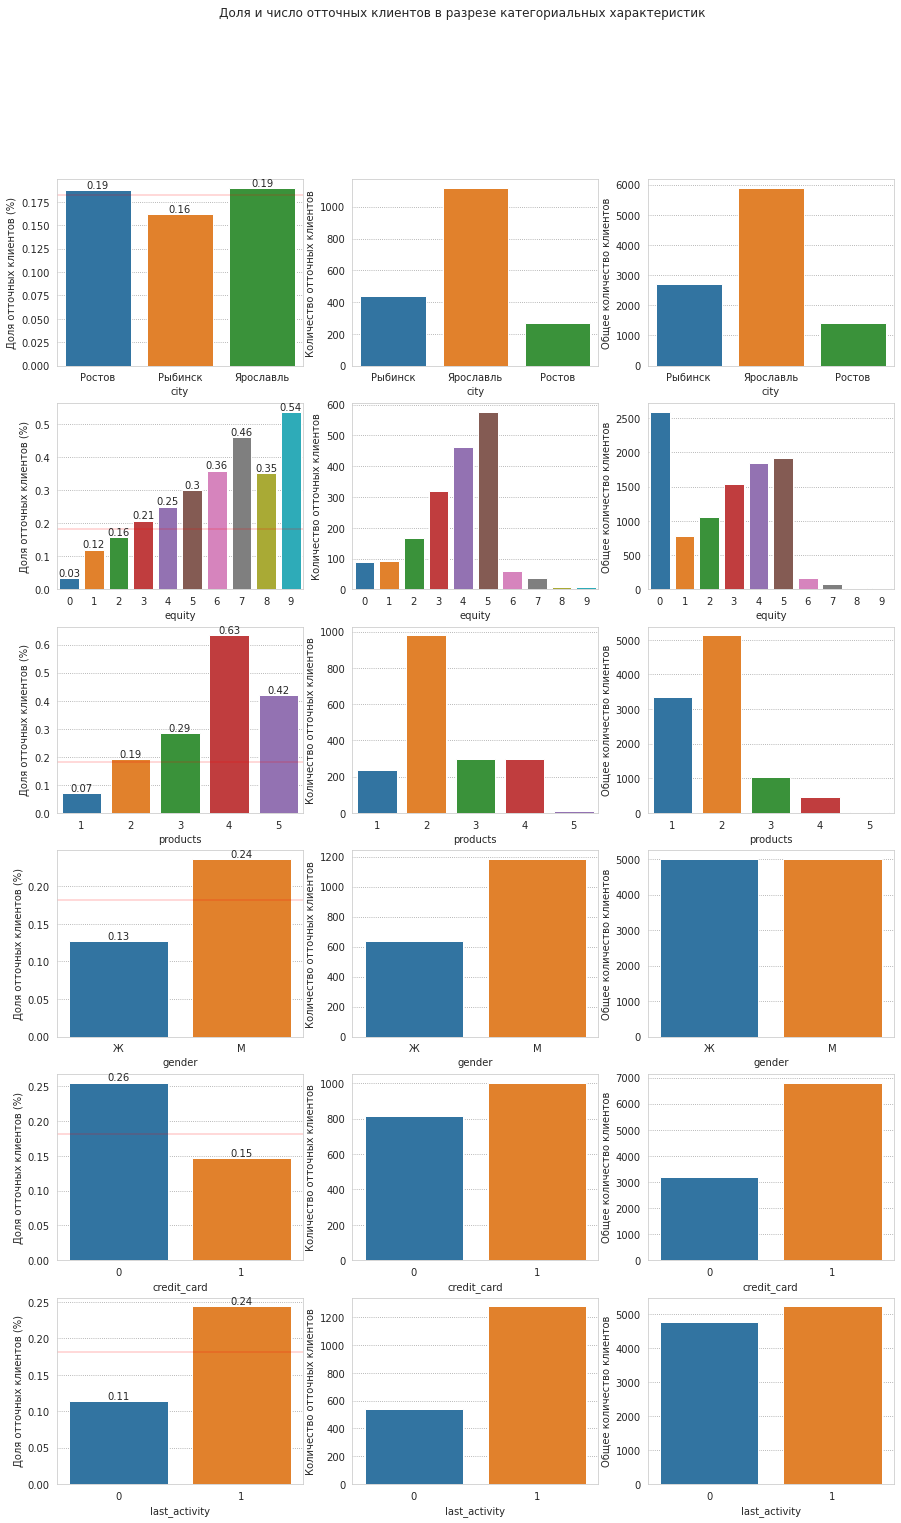

In [29]:
# Для категориальных характеристик построю столбчатые диаграммы
churn_mean=df['churn'].mean()
fig, axes = plt.subplots(6,3, figsize=(15, 24))
n=0
for categorical in ['city', 'equity', 'products', 'gender','credit_card', 'last_activity']:
    
    # вывожу долю отточных клиентов в категории
    levels=df.groupby(categorical).agg({'churn': 'mean'}).reset_index()
    sns.barplot(data=levels, x=categorical, y='churn', ax=axes[n][0])
    axes[n][0].axhline(y=churn_mean, color='red', alpha=0.2)
    axes[n][0].set_ylabel("Доля отточных клиентов (%)")
    
    # вывожу количество отточных клиентов в категории
    sns.countplot(data=df[df['churn'] == 1], x=categorical, ax=axes[n][1])
    axes[n][1].set_ylabel("Количество отточных клиентов")

    # вывожу количество всех клиентов в категории
    sns.countplot(data=df, x=categorical, ax=axes[n][2])
    axes[n][2].set_ylabel("Общее количество клиентов")
    
      
    # вывожу метки на столбцах
    labels=levels['churn'].values.round(2)
    rects=axes[n][0].containers[0].patches
    for rect, label in zip(rects, labels):
        axes[n][0].text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha="center", va="bottom")

    n+=1
fig.suptitle("Доля и число отточных клиентов в разрезе категориальных характеристик")
plt.show()

Исходя из графиков можно выделить следующие характеристики более отточных клиентов:
- количество баллов собственности больше или равно 3;
- продуктов больше или равно 3;
- пол - мужчина;
- отсутствует кредитная карта;
- активный клиент.

**Вывод:**

На основе полученных графиков можно выделить следующие характеристики клиентов с более высоким уровнем отттока:
- Баллы кредитного рейтинга от 820 до 920;
- Баланс на счете от 950 тыс. руб.;
- Оценочный доход от 100 тыс. руб. до 230 тыс. руб.;
- Возраст от 25 до 35 лет и от 50 до 60;
- Количество баллов собственности больше или равно 3;
- Продуктов больше или равно 3;
- Пол - мужчина;
- Отсутствие кредитной карты;
- Активный клиент.

### Корреляционный анализ характеристик клиентов и его визуализация

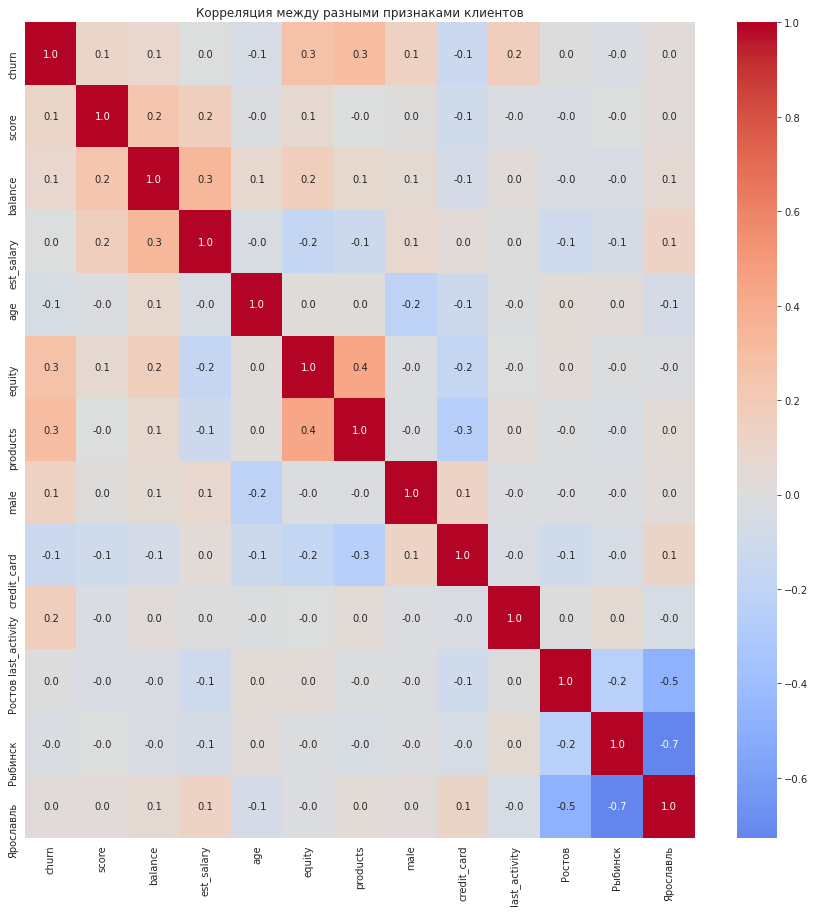

In [30]:
# Построю матрицу корреляции характеристик клиентов с более высоким уровнем оттока
correlation = df[['churn',
                  'score',
                  'balance',
                  'est_salary',
                  'age',
                  'equity',
                  'products',
                  'male',
                  'credit_card',
                  'last_activity',
                  'Ростов',
                  'Рыбинск',
                  'Ярославль'
                 ]].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, center=0, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Корреляция между разными признаками клиентов')
plt.show()

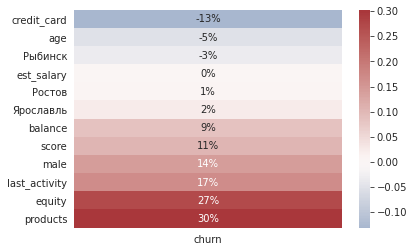

In [31]:
# Выведу отдельно данные о влиянии характеристик клиентов на отток
sns.heatmap(
    correlation.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt=".0%", cmap="vlag", center=0);

**Вывод:**
- Выявлена небольшая положительная корреляция между характеоистиками: количество используемых продуктов и количество баллов собственности, оценочный доход и баланс на счете; а также небольшая отрицательная корреляция между наличием кредитной карты и количеством используемх продуктов. Поэтому при сегментации клиентов следует вынести эти характеристики в разные сегменты, чтобы максимизировать покрытие.
- Наибольшее положительное влияние на отток оказывают количество баллов собственности и количество используемых продуктов. Оценочный доход не оказывает влияния на отток, его можно не учитывать при сегментации.

**Портрет типичного клиента банка**
- Самый крупный филиал находится в г. Ярославль. Там обслуживаются почти 60% клиентов. 
- По полу клиенты распределяются практически поровну.
- Большинство клиентов (68%) имеют кредитную карту.
- Число активных клиентов не значительно выше неактивных.
- Уровень оттока по банку составляет 18,2%.
- Больше всего клиентов имеют самую низкую оценку собственности.
- Наибольшее число клиентов пользуются двумя продуктами, следом идут клиенты с 1 продуктом.
- Наиболее распространенный возраст клиентов - 32-37 лет.
- Большинство клиентов имеют достаточно высокий кредитный рейтинг.
- В среднем баланс на счетах клиентов составляет 520 тыс. руб., но также есть клиенты с очень крупными счетами от 10 до 120 млн. руб.
- Средний доход клиентов составляет 120 тыс. руб., но так же есть и клиенты с очень высокими доходами от 400 тыс. до 1,4 млн. руб. 

**Характеристики клиентов с более высоким уровнем отттока:**
- Баллы кредитного рейтинга от 820 до 920;
- Баланс на счете от 950 тыс. руб.;
- Оценочный доход от 100 тыс. руб. до 230 тыс. руб.;
- Возраст от 25 до 35 лет и от 50 до 60;
- Количество баллов собственности больше или равно 3;
- Продуктов больше или равно 3;
- Пол - мужчина;
- Отсутствие кредитной карты;
- Активный клиент.

**Результаты корреляцинного анализа**
- Выявлена небольшая положительная корреляция между характеоистиками: количество используемых продуктов и количество баллов собственности, оценочный доход и баланс на счете; а также небольшая отрицательная корреляция между наличием кредитной карты и количеством используемх продуктов. 
- Наибольшее положительное влияние на отток оказывают количество баллов собственности и количество используемых продуктов. Оценочный доход не оказывает влияния на отток.

## Формулировка и проверка статистических гипотез

### Гипотеза о различии дохода между клиентами, которые ушли и которые остались

Сформулирую нулевую и альтернативную гипотезы:

**H0:** средние доходы оставшихся и отточных клиентов равны.

**H1:** средние доходы оставшихся и отточных клиентов не равны.

Выясню, какой тест подходит для проверки гипотезы: t-test или u-test.

Приму, что критический уровень статистической значимости alpha = 0.05.

Чтобы понять, можно ли применять t-тест, нужно проверить три условия:
- генеральные совокупности не зависят друг от друга,
- выборочные средние нормально распределены,
- дисперсии рассматриваемых генеральных совокупностей равны.

Проверю генеральные совокупности на соответствие критериям для проведения t-testa.

In [32]:
# Формирую выборки дохода отточных и неотточных клиентов
a = df[df['churn'] == 1]['est_salary']
b = df[df['churn'] == 0]['est_salary']

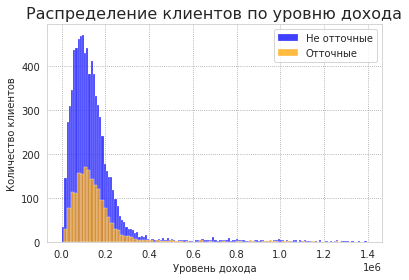

In [33]:
sns.histplot(b, color='blue')
sns.histplot(a, color='orange')
plt.legend(['Не отточные', 'Отточные'])
plt.title(f'Распределение клиентов по уровню дохода', fontsize = 16)
plt.ylabel('Количество клиентов')
plt.xlabel('Уровень дохода')
plt.show()

Проверю, можно ли считать данные о доходах нормально распределёнными с помощью критерия Шапиро-Уилка.

In [34]:
# Для отточных клиентов

alpha = 0.05  # критический уровень статистической значимости

shapiro_test, p_value = st.shapiro(a)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')

p-значение:  0.0
Распределение не нормально


In [35]:
# Для неотточных клиентов 

alpha = 0.05  # критический уровень статистической значимости

shapiro_test, p_value = st.shapiro(b)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  0.0
Распределение не нормально


In [36]:
# Оценю дисперсии

print(a.var()) 
print(b.var())

if a.var() == b.var():
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

15107935966.895876
20392519451.455894
Дисперсии не равны


В результате проверки условий t-теста выявлено:
- генеральные совокупности не зависят друг от друга;
- распределение значений не является нормальным;
- дисперсии не равны.

Таким образом, выборки не подходят для проведения t-теста. При отсутствии нормального распределения сравниваемых выборок вместо t-теста используется U-критерий Манна-Уитни.

In [37]:
# Проведу u-test

alpha = 0.05  

results = st.mannwhitneyu(a, b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу


**Вывод:**
- Распределение не является нормальным, поэтому для проверки гипотезы был выбран U-критерий Манна-Уитни.
- Нулевая гипотеза отвергнута, т.е. доходы оставшихся и отточных клиентов не равны.

Проведу t-test и сравню результаты.

In [38]:
alpha = 0.05

results = st.ttest_ind(a, b)

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8839364433181659
Не получилось отвергнуть нулевую гипотезу


В результате проведения t-теста не удалось отвергнуть нулевую гипотезу. Однако доверять этому критерию не стоит, т.к. в данных есть большие (по сравнению с нормальным распределением) выбросы. Есть клиенты с очень высоким доходом. В этом случае даже одно выбивающееся значение существенно влияет на результат. В случае наличия в данных большого числа выбрасов следует использовать непараметрических критерий Манна-Уитни.

### Гипотеза о различии кредитных рейтингов клиентов, которые ушли и которые остались

Сформулирую нулевую и альтернативную гипотезы:

**H0:** кредитные рейтинги оставшихся и отточных клиентов равны.

**H1:** кредитные рейтинги оставшихся и отточных клиентов не равны.

Выясню, какой тест подходит для проверки гипотезы: t-test или u-test.

Приму, что критический уровень статистической значимости alpha = 0.05.

Чтобы понять, можно ли применять t-тест, нужно проверить три условия:
- генеральные совокупности не зависят друг от друга,
- выборочные средние нормально распределены,
- дисперсии рассматриваемых генеральных совокупностей равны.

Проверю генеральные совокупности на соответствие критериям для проведения t-testa.

In [39]:
# Формирую выборки дохода отточных и неотточных клиентов
c = df[df['churn'] == 1]['score']
d = df[df['churn'] == 0]['score']

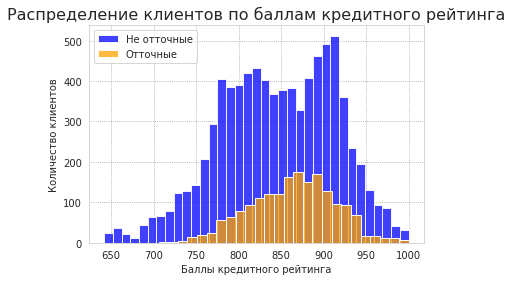

In [40]:
sns.histplot(d, color='blue')
sns.histplot(c, color='orange')
plt.legend(['Не отточные', 'Отточные'])
plt.title(f'Распределение клиентов по баллам кредитного рейтинга', fontsize = 16)
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы кредитного рейтинга')
plt.show()

Проверю, можно ли считать данные о кредитных рейтингах нормально распределёнными, с помощью критерия Шапиро-Уилка.

In [41]:
# Для отточных клиентов

alpha = 0.05  # критический уровень статистической значимости

shapiro_test, p_value = st.shapiro(c)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')

p-значение:  0.00010231484338873997
Распределение не нормально


In [42]:
# Для неотточных клиентов

alpha = 0.05  # критический уровень статистической значимости

shapiro_test, p_value = st.shapiro(d)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')

p-значение:  3.817680641163025e-26
Распределение не нормально


In [43]:
# Оценю дисперсии

print(c.var()) 
print(d.var())

if a.var() == b.var():
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

2457.3047909518823
4630.492360930297
Дисперсии не равны


В результате проверки условий t-теста выявлено:
- генеральные совокупности не зависят друг от друга;
- распределение значений не является нормальным;
- дисперсии не равны.

Таким образом, выборки не подходят для проведения t-теста. При отсутствии нормального распределения сравниваемых выборок вместо t-теста используется U-критерий Манна-Уитни.

In [44]:
# Проведу u-test

alpha = 0.05  

results = st.mannwhitneyu(c, d)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  7.364570509844462e-22
Отвергаем нулевую гипотезу


**Вывод:**
- Распределение не является нормальным, поэтому для проверки гипотезы был выбран U-критерий Манна-Уитни.
- Нулевая гипотеза отвергнута, т.е. кредитные рейтинги оставшихся и отточных клиентов не равны.

## Сегментация отточных клиентов

По итогам проведенного анализа выделю несколько высокоотточных сегментов.

**Сегмент 1**
- Пол: мужской.
- Количество продуктов: больше или равно 3.

In [46]:
s1 = df.query("male == 1 and products >= 3")
print('Размер сегмента: ', s1['userid'].count())
print('Уровень оттока по сегменту: ', s1['churn'].sum()/s1['churn'].count())

Размер сегмента:  752
Уровень оттока по сегменту:  0.5


**Сегмент 2**
- Баланс на счете: более 950 тыс. руб.
- Количество баллов собственности: больше или равно 3.
- Возраст: 50 - 60 лет.

In [47]:
s2 = df.query("balance > 950000 and equity >= 3 and 50 <= age <= 60")
print('Размер сегмента: ', s2['userid'].count())
print('Уровень оттока по сегменту: ', s2['churn'].sum()/s2['churn'].count())

Размер сегмента:  449
Уровень оттока по сегменту:  0.47216035634743875


**Сегмент 3**
- Баллы кредитного скоринга: 820 - 920.
- Активность: да.
- Наличие кредитной карты: нет.

In [48]:
s3 = df.query("820 <= score <= 920 and last_activity == 1 and credit_card == 0")
print('Размер сегмента: ', s3['userid'].count())
print('Уровень оттока по сегменту: ', s3['churn'].sum()/s3['churn'].count())

Размер сегмента:  1062
Уровень оттока по сегменту:  0.4548022598870056


## Выводы и рекомендации

**Общие характеристики клиентов банка:**
- Самый крупный филиал находится в г. Ярославль. Там обслуживаются почти 60% клиентов. 
- По полу клиенты распределяются практически поровну.
- Большинство клиентов (68%) имеют кредитную карту.
- Число активных клиентов не значительно выше неактивных.
- Уровень оттока по банку составляет 18,2%.
- Больше всего клиентов имеют самую низкую оценку собственности.
- Наибольшее число клиентов пользуются двумя продуктами, следом идут клиенты с 1 продуктом.
- Наиболее распространенный возраст клиентов - 32-37 лет.
- Большинство клиентов имеют достаточно высокий кредитный рейтинг.
- В среднем баланс на счетах клиентов составляет 520 тыс. руб., но также есть клиенты с очень крупными счетами от 10 до 120 млн. руб.
- Средний доход клиентов составляет 120 тыс. руб., но так же есть и клиенты с очень высокими доходами от 400 тыс. до 1,4 млн. руб. 

**Характеристики клиентов с более высоким уровнем отттока:**
- Баллы кредитного рейтинга от 820 до 920;
- Баланс на счете от 950 тыс. руб.;
- Оценочный доход от 100 тыс. руб. до 230 тыс. руб.;
- Возраст от 25 до 35 лет и от 50 до 60;
- Количество баллов собственности больше или равно 3;
- Продуктов больше или равно 3;
- Пол - мужчина;
- Отсутствие кредитной карты;
- Активный клиент.

**Влияние характеристик на отток:**
- Наибольшее положительное влияние на отток оказывают количество баллов собственности и количество используемых продуктов. 
- Оценочный доход не оказывает влияния на отток.

**Рекомендации для отдела маркетинга:**

*Сегмент 1*
- Пол: мужской.
- Количество продуктов: больше или равно 3.

*Рекомендации:*
- Предложить повышенный кешбек на товары для спорта и активного отдыха.
- Для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк.
- Провести анализ продуктов, используемых клиентами, и выяснить причины неудовлетворенности клиентов продуктами и как следствие их уход из банка.

*Сегмент 2*
- Баланс на счете: более 950 тыс. руб.
- Количество баллов собственности: больше или равно 3.
- Возраст: 50 - 60 лет.

*Рекомендации:*
- Предложить уникальные условия по накопительным счетам.
- Предложить продукты страхования собственности.

*Сегмент 3*
- Баллы кредитного скоринга: 820 - 920.
- Активность: да.
- Наличие кредитной карты: нет.

*Рекомендации:*
- Предложить оформить кредитную карту на льготных условиях.
- Предложить льготные условия кредитования.